# **Ejemplo de análisis de sentimiento usando un enfoque basado en léxico**

En este ejemplo, vamos a llevar a cabo los pasos necesarios para realizar un análisis de sentimiento partiendo de una gran cantidad de comentarios con la idea de analizar el sentimiento de dichos comentarios. 

Vamos a utilizar el archivo Reviews.csv (https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv) del conjunto de datos de Amazon Fine Food Reviews de Kaggle para realizar el análisis. 

Este conjunto de datos consta de reseñas de alimentos finos de Amazon. Los datos abarcan un período de más de 10 años, incluidas aproximadamente 500 000 reseñas hasta octubre de 2012. Las reseñas incluyen información del producto y del usuario, calificaciones y una reseña en texto sin formato. También incluye reseñas de todas las demás categorías de Amazon. Realmente, la versión que tenéis disponible es una versión reducida con solamente 1000 comentarios.


**Paso 1: Leer el dataframe**

Lo primero que vamos a hacer es leer el fichero y almacenarlo en un DataFrame de Python.

In [3]:
#Importamos la librería pandas
import pandas as pd

#Leemos el fichero csv, lo pasamos a dataframe y mostramos los primeros elementos
df_reviews = pd.read_csv('Reviews-red.csv')
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Podemos observar que el dataframe contiene productos, usuarios e información de la reseña.

Los datos que vamos a utilizar para el análisis será “Text” y “Score”.

1. Text – Es la variable que contiene la reseña completa.
3. Score – Es la calificación que el cliente le ha asigando al producto. 



**Paso 2: Análisis de Datos**

Ya que tenemos los datos en la variable df_reviews vamos a realizar un análisis rápido de la variable “Score” para revisar cuáles son las puntuaciones que los usuarios han realizado mayoritariamente.

Para realizar este paso utilizaremos la librería season


<Axes: xlabel='Score', ylabel='count'>

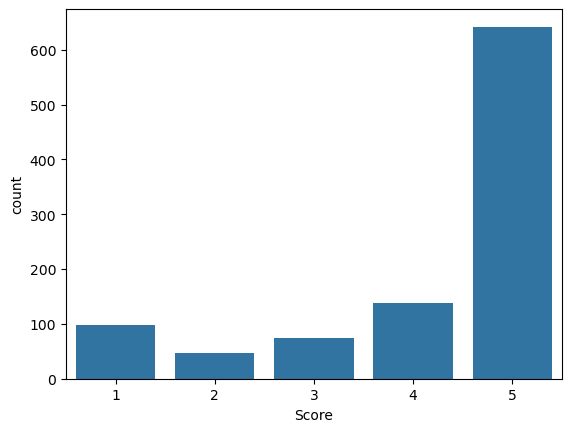

In [4]:
import seaborn as sns

sns.countplot(x='Score',data=df_reviews)

Se puede ver que la mayoría de las calificaciones de los clientes tienen una ponderación de 5. Esto nos lleva a pensar que la mayoría de las reseñas son positivas, las cuales analizaremos en breve.




En este primer análisis de los datos, también es interesante crear una nube de palabras, para conocer las palagras que más se emplean en los comentarios.

In [5]:
#Importamos nltk y el corpus de stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#Importamos wordclout y utilizamos el stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

#Importamos matlibplot
import matplotlib.pyplot as plt


#Creamos la lista de palabras quitando los stopwords
#a los que se les ha añaiddo las palabras 'br' y 'href'
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in df_reviews.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

#Mostramos la nube de palabras, quitando los ejes
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'nltk'

Se puede identificar como palabras populares: "Chip", "Good", “Taste”, “Love”, “bag”, “great”, “food”. Estas palabras son en su mayoría positivas, lo que también nos indica que la mayoría de las reseñas del conjunto de datos expresan un sentimiento positivo.

 


**Paso 3: Clasificando los tweets**

Aprovechando que tenemos valoraciones de 1 a 5, las vamos a usar para clasificar las reseñas como *positivas*, *negativas* y *neutras*, de esta forma podremos después utilizar estos valores para comprobar el rendimiento del enfoque usado para identificar los sentimientos de forma automática.

Las reseñas positivas serán clasificadas como +1, las reseñas negativas serán clasificadas como -1 y las neutras como 0.

El procedimiento que vamos a seguir es: todas las reseñas con *Score* > 3 se califican como positivo, *Score* < 3 como negativo y finalmente, las que tengan *Score* = 3 como neutras. 

In [ ]:
#Obtenemos el sentimiento en función del score asignado
real_sentiment = ['positive' if score > 3 
                          else 'negative' if score < 3 
                                else 'neutro'
                                    for score in df_reviews['Score']]

#Añadimos una nueva columna a nuestro dataframe
df_reviews['real_sentiment'] = real_sentiment

#Mostramos los primeros elementos
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,real_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


Una vez clasificados todos los reviews como positivos, negativos o neutros, vamos a ver su distribución mediante un mensaje de barras

<Axes: xlabel='real_sentiment', ylabel='count'>

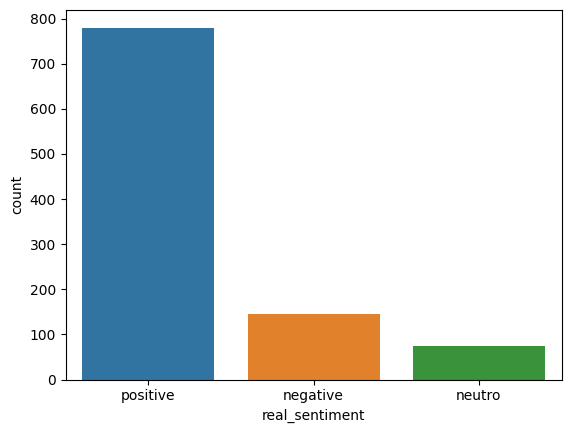

In [ ]:

# Mostramos un diagrama de barras con el número de comentarios de cada tipo que tenemos
sns.countplot(x='real_sentiment',data=df_reviews)


Como ya se vio cuando se analizó con el score, la mayoría de las opiniones tenían una valor de 5, con lo que en los comentarios positivos que tienen un score mayor de 3 son los más numerosos.

**Paso 4: Analizando el sentimiento de las opiniones utilizando un enfoque basado en léxico**

Concretamente, vamos a usar la propiedad sentiment de TextBlob que ya hemos visto su funcionamiento en un ejemplo previo. Este método nos asignará un valor de polaridad y subjectivdad a cada una de las opiniones.

In [ ]:
#Asignamos la polaridad y subjectividad de cada una de las reseñas según
#textblob
from textblob import TextBlob

reviews_polarity = [TextBlob(review).sentiment.polarity for review in df_reviews['Text']]
reviews_subjectivity = [TextBlob(review).sentiment.subjectivity for review in df_reviews['Text']]

#Incluimos dicha información en nuestro dataframe
df_reviews['Polarity'] = reviews_polarity 
df_reviews['Subjectivity'] = reviews_subjectivity

#Mostramos los elementos
print(df_reviews)

       Id   ProductId          UserId                      ProfileName  \
0       1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1       2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2       3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3       4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4       5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
..    ...         ...             ...                              ...   
995   996  B006F2NYI2  A1D3F6UI1RTXO0                           Swopes   
996   997  B006F2NYI2   AF50D40Y85TV3                          Mike A.   
997   998  B006F2NYI2  A3G313KLWDG3PW                          kefka82   
998   999  B006F2NYI2  A3NIDDT7E7JIFW                  V. B. Brookshaw   
999  1000  B006F2NYI2  A132DJVI37RB4X                        Scottdrum   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                       1              

Vamos a predecir cada una de las opiniones como positivas, negativas o neutras. En función del valor de polaridad asignado por el método. Para ello, las que tengan una polaridad menor de -0.1 se van a considerar negativas, las que van de -0.1 a +0.1 neutras, y finalmente, las que sean mayoras de +0.1 van a ser positivas.

In [ ]:
# Almacenamos el sentimiento predicho para cada una de la reseñas
predicted_sentiments = ['positive' if score >= 0.1 
                          else 'negative' if score <= -0.1 
                            else 'neutro' for score in df_reviews['Polarity']]

#Añadimos los sentimientos predichos a df_reviews
df_reviews['predicted_sentiment'] = predicted_sentiments

Vamos a mostrar en una tabla la información del texto, sentimiento predicho y sentimiento real para hacernos una idea de los aciertos. También incluiremos la polaridad para ver el valor concreto asignado. Además, se van a colorear cada opción para que se pueda apreciar más rápido los aciertos y fallos

In [ ]:
#Creamos un report con información del texto, sentimiento real y predicho y le vamos a asignar color
report = {'Text':df_reviews['Text'],'Real_sentiments':df_reviews['real_sentiment'], 'Predicted_sentiments':df_reviews['predicted_sentiment'], 'Polarity':df_reviews['Polarity']}

report = pd.DataFrame(data=report)

def color(value):
 if value == 'positive':
  color = 'green'
 elif value =='negative':
  color = 'red'
 else:
  color = 'orange'
 return 'color: %s' % color

report.style.applymap(color, subset=['Real_sentiments','Predicted_sentiments'])


,Text,Real_sentiments,Predicted_sentiments,Polarity
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,positive,0.450000
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,neutro,-0.033333
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,positive,0.133571
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,positive,0.166667
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,positive,0.483333
5,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",positive,positive,0.257407
6,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",positive,positive,0.250833
7,This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!,positive,positive,0.486000
8,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,positive,positive,0.428571
9,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,positive,positive,0.450000


A continuación, mostraremos la matriz de confusión para hacernos una idea de los aciertos y fallos en cada una de la clases.

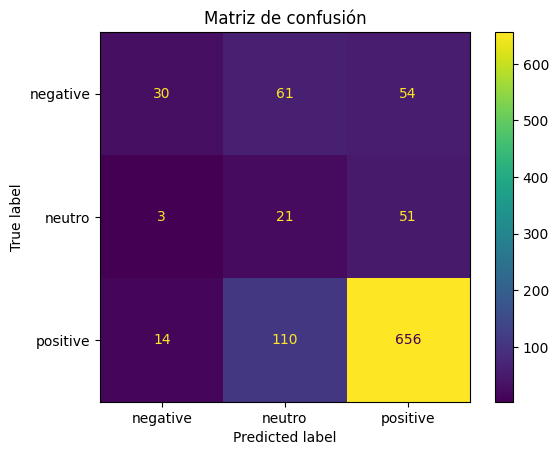

In [ ]:
#Importar las librerías
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


#Mostramos la matriz de confusión
ConfusionMatrixDisplay.from_predictions(df_reviews['real_sentiment'], df_reviews['predicted_sentiment'])
plt.title("Matriz de confusión")
plt.show()


Se puede ver que la clase mejor clasificada es los sentimientos positivos. La clase que más fallos produce es la clasificación de la clase positiva como neutra.

Finalmente, utilizando otra función de la librería, report, vamos a obtener un resumen de los valores de precision, recall y f1-score.

In [ ]:
# Importar la librerías
from sklearn.metrics import classification_report

#Mostramos el resumen de las medidas
print(classification_report(df_reviews['real_sentiment'], df_reviews['predicted_sentiment'], labels=['positive','negative','neutro']))

              precision    recall  f1-score   support

    positive       0.86      0.84      0.85       780
    negative       0.64      0.21      0.31       145
      neutro       0.11      0.28      0.16        75

    accuracy                           0.71      1000
   macro avg       0.54      0.44      0.44      1000
weighted avg       0.77      0.71      0.72      1000



Vemos que las primeras filas nos muestran cada métrica considerando una de las clases como positivas y el resto negativas. Esta información nos muestra que:

Precision: a) de todos los comentarios positivos que el modelo predice, el 86% realmente lo es. b) de todos los comentarios negativos que el modelo predice, el 64% realmente lo es y c) de todos los comentarios neutros que el modelo predice, solamente el 11% lo es.

Recall: a) de todos los comentarios positivos, el modelo predice correctamente el 84%, b) de todos los comentarios negativos, el modelo predice correctamente el 21% y c) de todos los comentarios neutros, el modelo predice correctamente el 28%.

F1-score: esta medida combina precision y recall, combina ambos valore en una media harmónica, cuanto más cercano esté a 1 mejor es el modelo. En principio, como resume a las dos anteriores, nos muestra que el modelo predice muy bien la clase positiva, y para la negativa y neutra no es muy acertada, siendo la peor identificada la neutra.

Finalmente, podemos ve que nos muestra también el valor de accuracy sobre el global, como se trata de un problema muy desbalanceado, donde la mayoría de los comentarios son positivos, la accuracy (exactitud) es un 71%.

Como medida global nos da el valor de la medida calculada por el procedimiento macro. El macro pesado es similar al cálculo de macro, pero estableciendo un peso en función de los ejemplos de cada clase.